In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from scipy.linalg import qr

In [2]:
np.random.seed(1)
T = 100
t_end = 0.8
dt = t_end / T
t = np.linspace(0, t_end, T)
x1 = 10.0*(np.cos(4*np.pi*t) + 1.5)*dt
s = np.zeros((T,))
for i in range(T):
    s[i] = float(np.random.poisson(x1[i]))
print(s)
ind = np.where(s==1.0)[0]
times = ind*dt

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


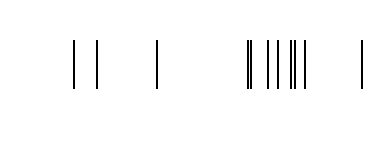

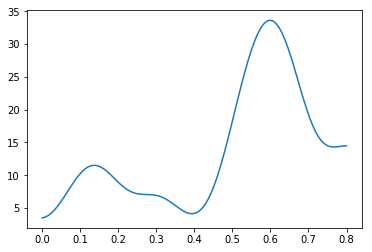

In [3]:
plt.figure(figsize=(6,2));
plt.eventplot(times, colors=['k'], orientation='horizontal', linewidths=2);
plt.xlim([0, t_end])
plt.axis('off')
plt.show();
x = scipy.ndimage.gaussian_filter(s, 8.0)
plt.plot(t, x/dt)



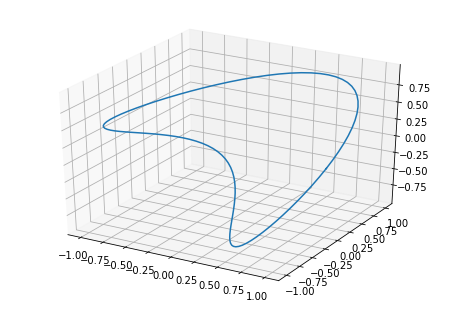

In [4]:
from mpl_toolkits.mplot3d import Axes3D
beta = 1.0
x1 = np.cos(2*np.pi*t/t_end)
x2 = np.sin(4*np.pi*t/t_end)
x3 = beta*np.sin(2*np.pi*t/t_end)
X = np.array([x1, x2, x3])

fig = plt.figure()
fig.add_axes([0, 0, 1, 1], projection='3d')
plt.plot(x1, x2, x3)
plt.show()

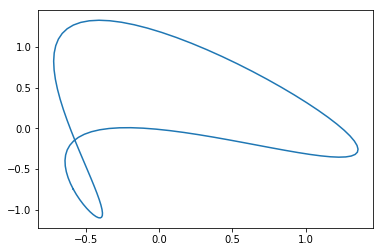

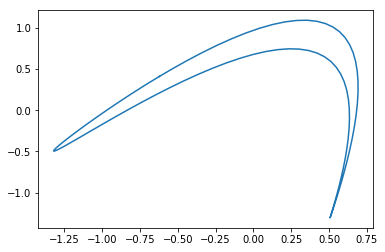

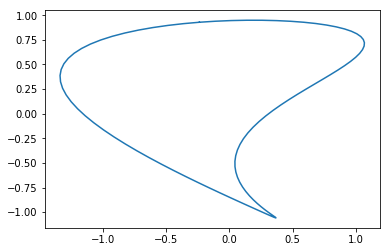

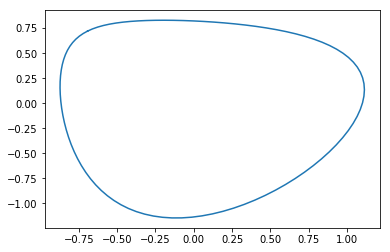

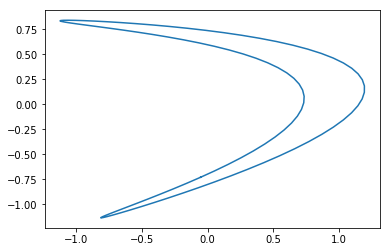

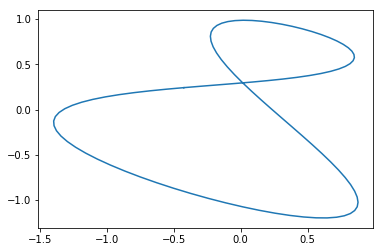

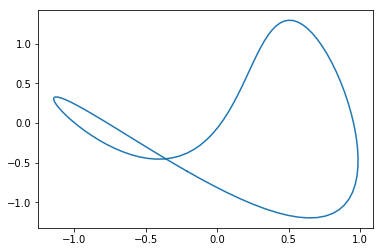

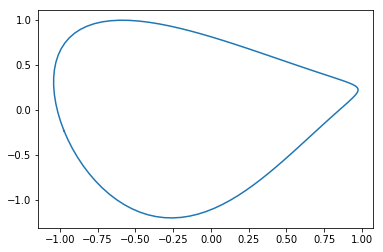

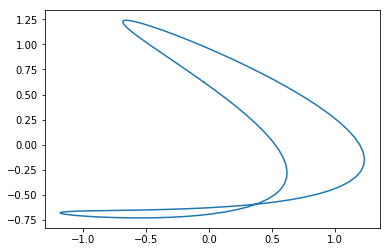

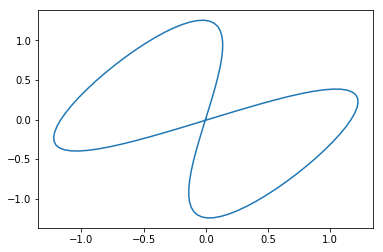

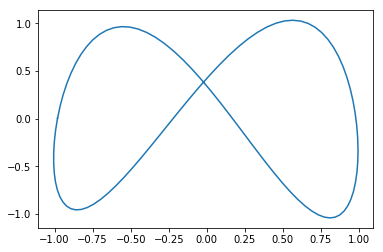

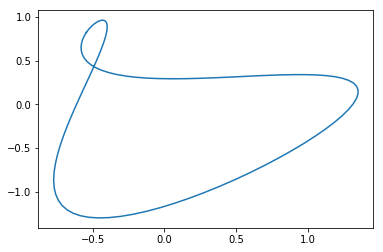

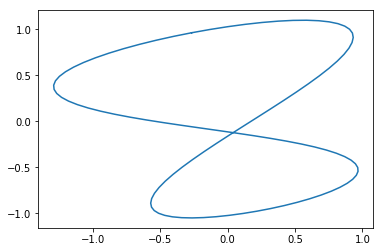

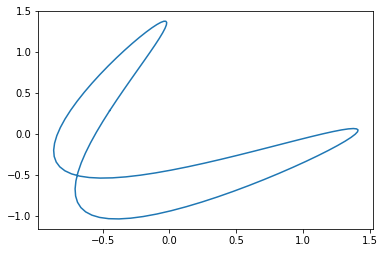

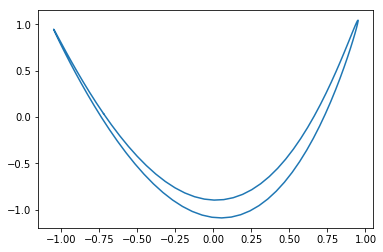

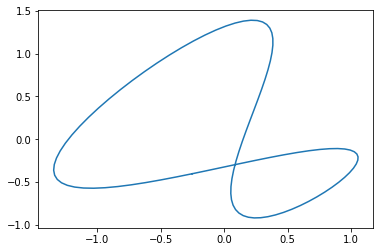

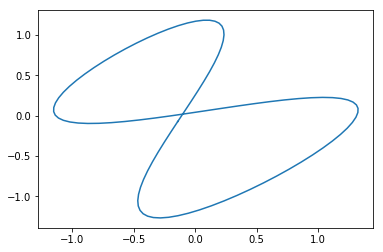

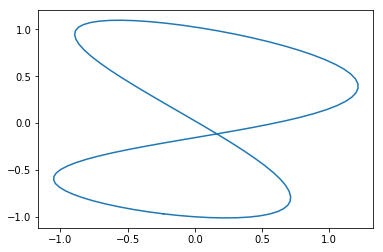

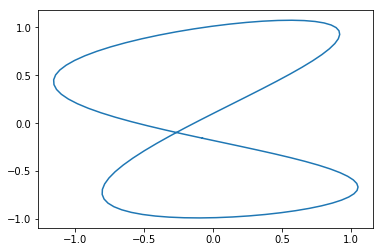

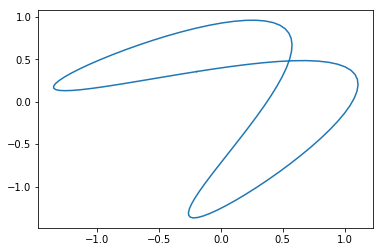

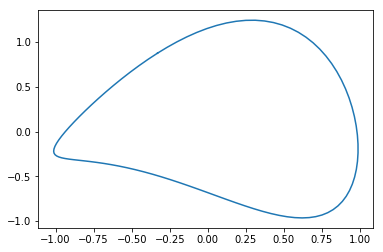

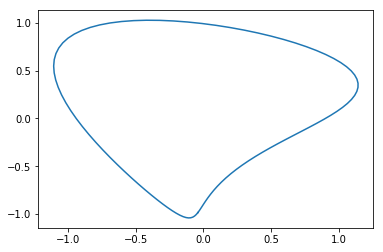

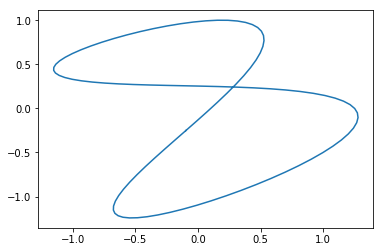

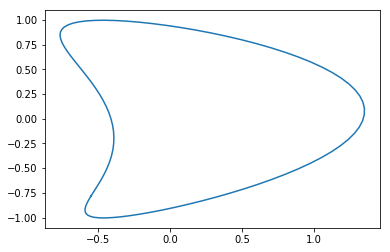

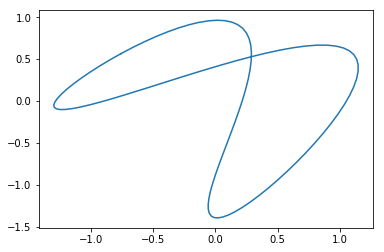

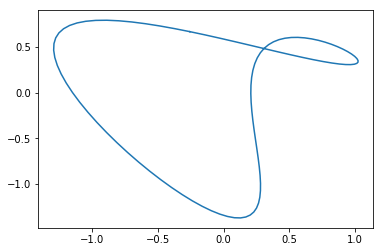

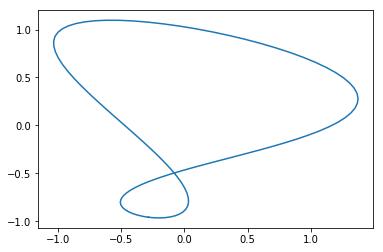

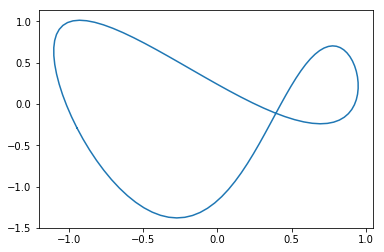

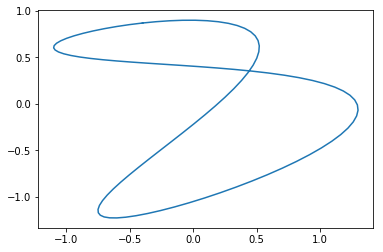

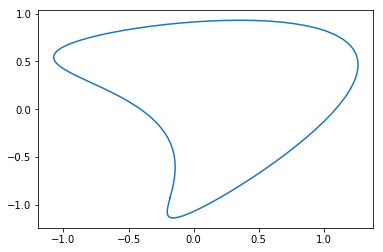

In [18]:
for i in range(30):
    np.random.seed(i)
    Q, _ = qr(np.random.randn(3,3))
    r = np.dot(Q, X) # rates

    plt.figure()
    plt.plot(r[0], r[1])
    plt.show()


In [ ]:


fig = plt.figure()
fig.add_axes([0, 0, 1, 1], projection='3d')
plt.plot(r[0], r[1], r[2])
plt.show()

In [15]:
from neuron_movie_lib import poisson_spikes
np.random.seed(1)
mean_FR = 8
shift = np.min(r[0])
rates = mean_FR*(r[0] - shift)

s = poisson_spikes(rates*dt)
times = dt*np.where(s==1.0)[0]
x = scipy.ndimage.gaussian_filter(s, 8.0)/dt
print(s)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


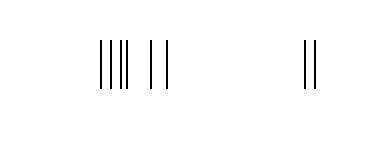

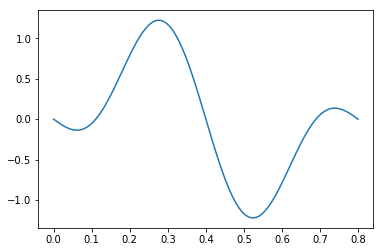

In [16]:
plt.figure(figsize=(6,2));
plt.eventplot(times, colors=['k'], orientation='horizontal', linewidths=2);
plt.xlim([0, t_end])
plt.axis('off')
plt.show();
x = scipy.ndimage.gaussian_filter(s, 8.0)
plt.plot(t, r[0])